In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Data_Amazon.csv', encoding= 'iso-8859-1', parse_dates=['date'])
df.head(2)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01


### 1. Display Top 5 Rows of the Dataset


In [2]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### 2. Display Last 5 Rows of the Dataset


In [3]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### 3. Find Shape of the Dataset


In [4]:
print('Rows:', df.shape[0])
print('Columns:',df.shape[1])

Rows: 6454
Columns: 5


### 4. Get Information of the Dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### 5. Check Duplicate Data and Drop Them


In [6]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace=True)

### 6. Check Null Values in the Dataset


In [8]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

### 7. Get Overall Statistics of the Dataframe


In [9]:
df.describe(include='all', datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


### 8. Rename Month Names to English


In [10]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [11]:
df['Month_Eng'] = df['month'].replace({'Janeiro':'January', 'Fevereiro':'February', 'Março':'March', 'Abril':'April', 
'Maio':'May','Junho':'June', 'Julho':'July','Agosto':'August', 'Setembro':'September', 'Outubro':'October', 
'Novembro':'November', 'Dezembro':'December'})

df['Month_Eng'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

### 9. Total Number of Fires Registered


In [12]:
print('Total Number of Fires Registered:', df.shape[0], '(Without Duplicates)')

Total Number of Fires Registered: 6422 (Without Duplicates)


### 10. Which Month Has the Highest Cumulative Number of Forest Fires Reported? (1998-2017)


In [15]:
test1 = df.groupby('Month_Eng')['number'].sum().sort_values(ascending=False).reset_index()
months_categories1= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
test1['Month_Eng'] = pd.Categorical(test1['Month_Eng'], categories=months_categories1)
test1.sort_values(by = 'Month_Eng')

,Month_Eng,number
7,January,47681.844
9,February,30839.050
10,March,30709.405
11,April,28184.770
8,May,34725.363
6,June,55997.675
0,July,92319.113
2,August,88050.435
4,September,58578.305
1,October,88681.579


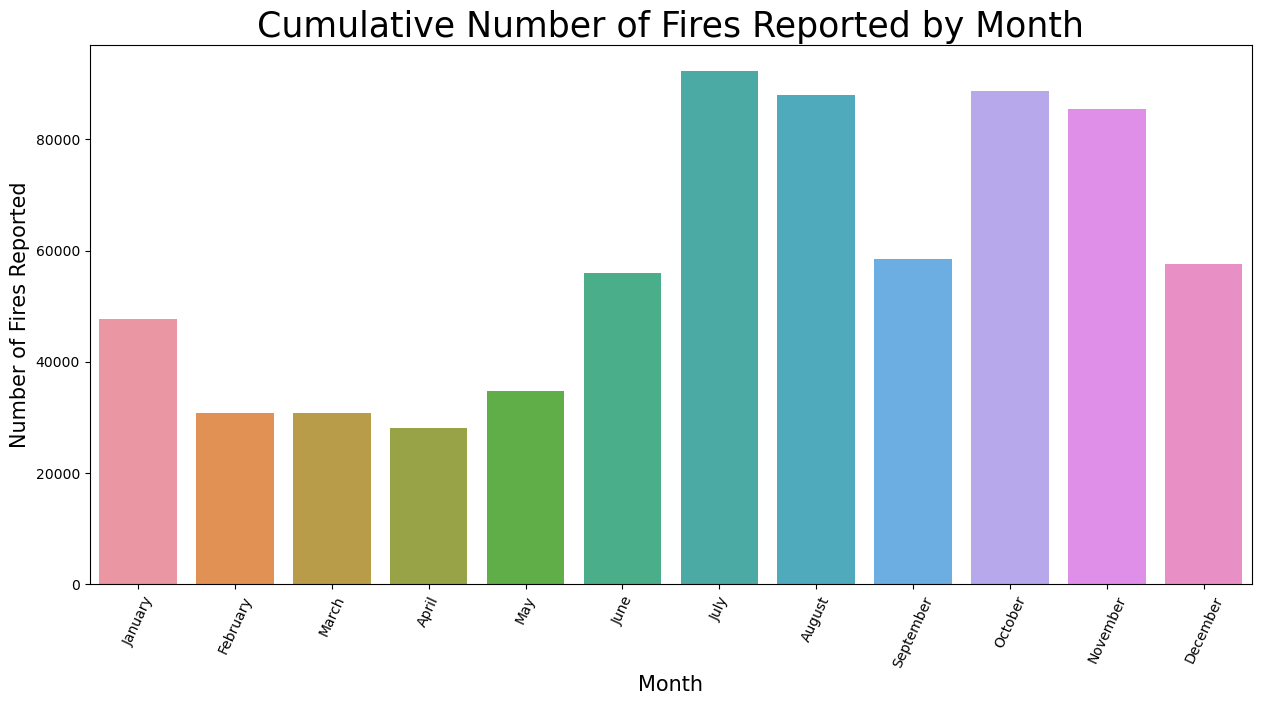

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x='Month_Eng', y='number', data=test1)
plt.title('Cumulative Number of Fires Reported by Month', fontsize=25)
plt.xticks(rotation=65)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Fires Reported', fontsize=15)
plt.show()

### 11. Which Year Has the Highest Number of Forest Fires Reported?


In [ ]:
df.groupby('year')['number'].sum().sort_values(ascending=False).reset_index()

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39116.178
6,2004,38450.163
7,2002,37390.600
8,2010,37037.449
9,2017,36619.624


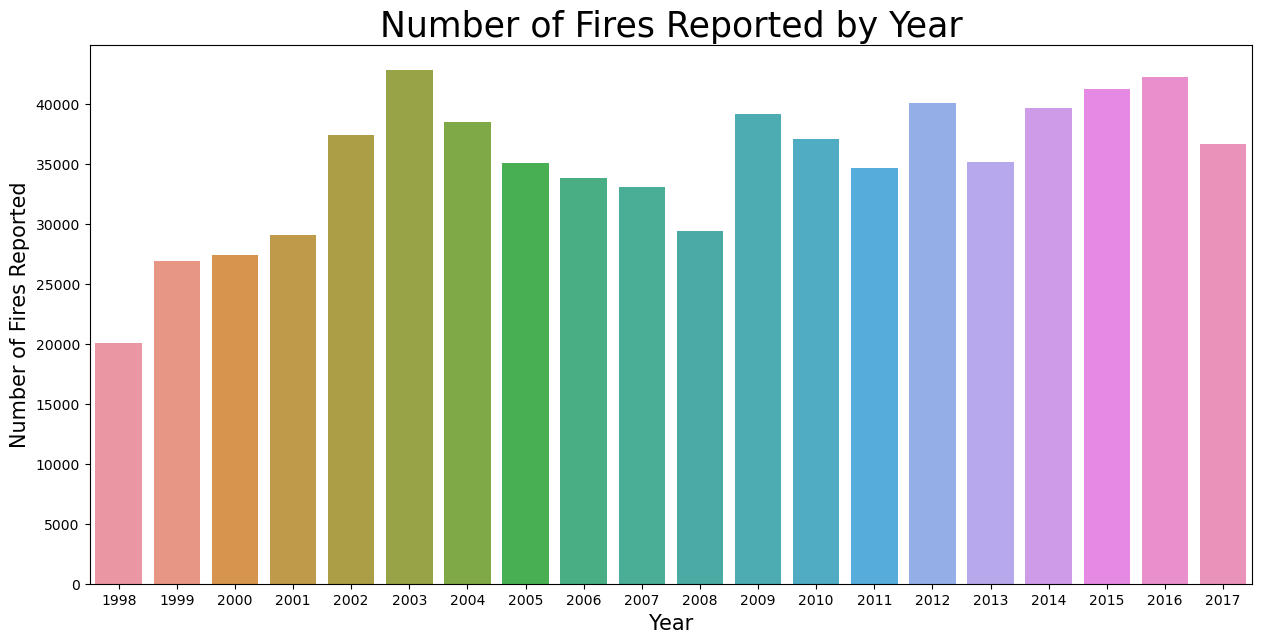

In [ ]:
test2 = df.groupby('year')['number'].sum().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='year', y='number', data=test2)
plt.title('Number of Fires Reported by Year', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Fires Reported', fontsize=15)
plt.show()


### 12. Which State Has the Highest Cumulative Number of Forest Fires Reported? (1998-2017)


In [ ]:
test3 = df.groupby('state')['number'].sum().sort_values(ascending=False).reset_index()
test3

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


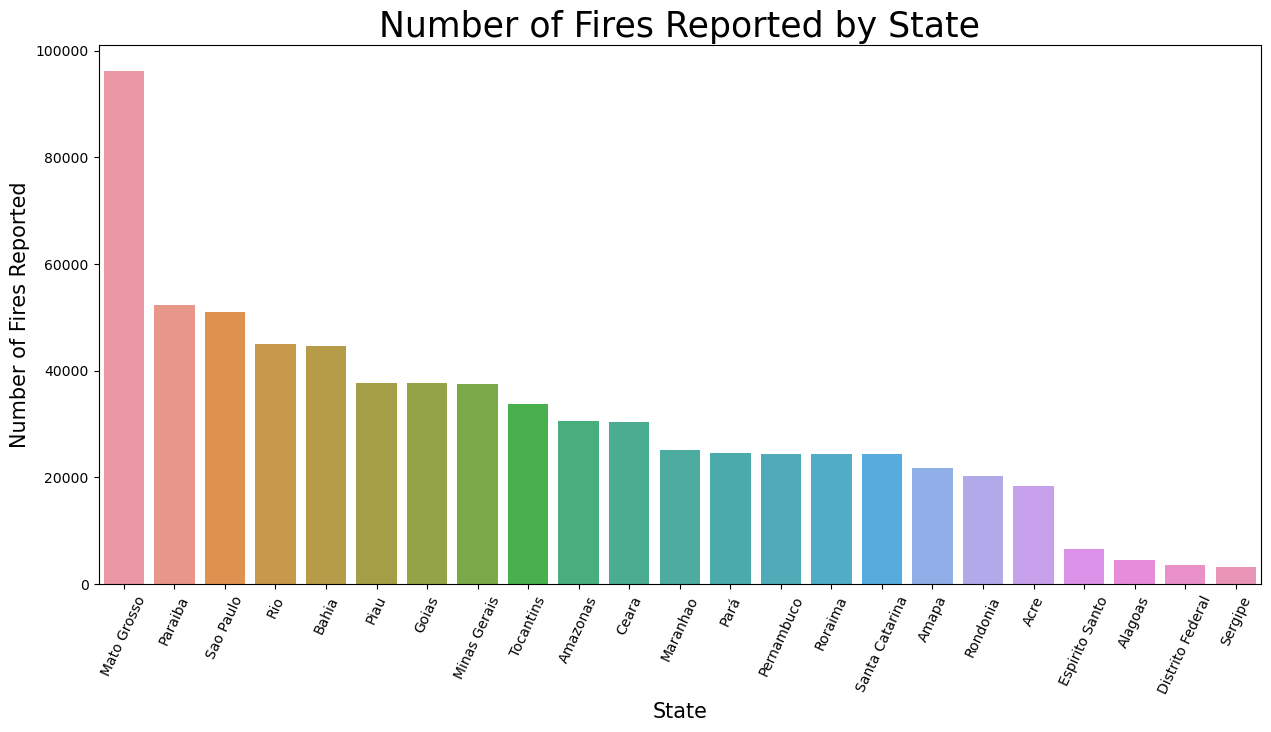

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='state', y='number', data=test3)
plt.title('Number of Fires Reported by State', fontsize=25)
plt.xticks(rotation=65)
plt.xlabel('State', fontsize=15)
plt.ylabel('Number of Fires Reported', fontsize=15)
plt.show()

### 13. Find Total Number of Fires Reported In Amazon


In [ ]:
df[df['state'] == 'Amazonas']['number'].sum()

30650.129

### 14. Display Number of Fires Reported in Amazon by Year


In [ ]:
test4 = df[df['state'] == 'Amazonas']
test4

,year,state,month,number,date,Month_Eng
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December


In [ ]:
test5 = test4.groupby('year')['number'].sum().reset_index()
test5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


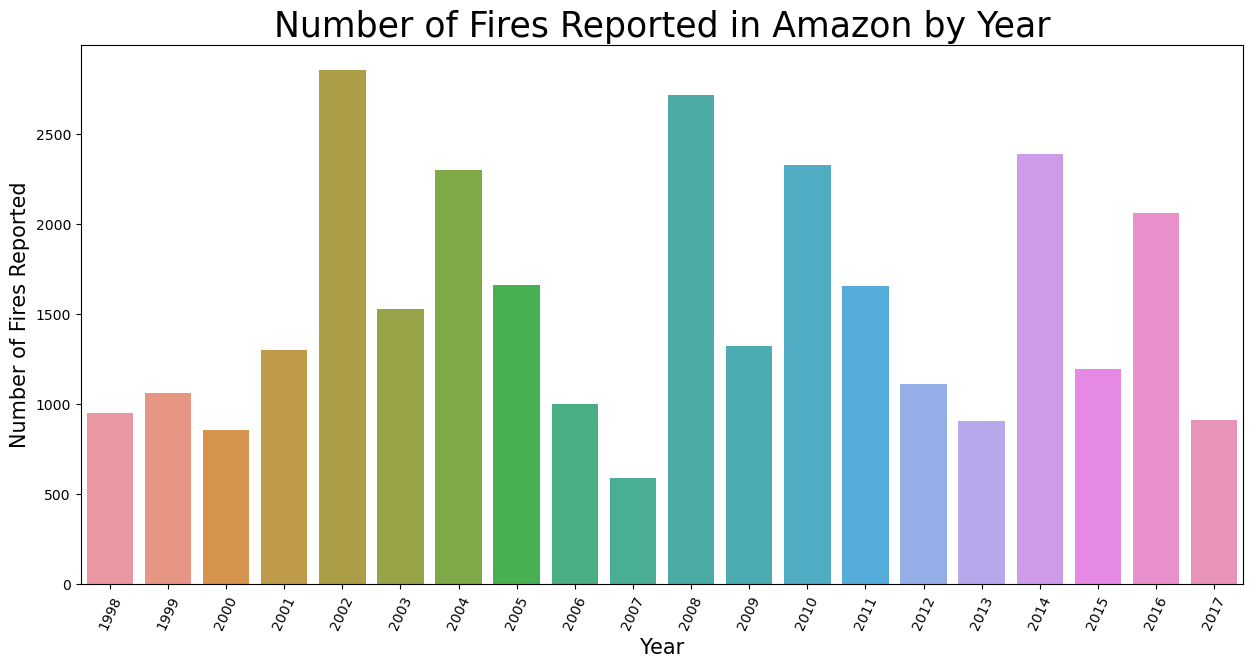

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='year', y='number', data=test5)
plt.title('Number of Fires Reported in Amazon by Year', fontsize=25)
plt.xticks(rotation=65)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Fires Reported', fontsize=15)
plt.show()

### 15. Find Total Number of Fires Reported in 2015 and Visualize Data Based on Each ‘Month’


In [17]:
test7 = df[df['year'] == 2015]
test8 = df.groupby(test7['Month_Eng'])['number'].sum().reset_index()
months_categories2= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
test8['Month_Eng'] = pd.Categorical(test1['Month_Eng'], categories=months_categories2)
test8.sort_values(by = 'Month_Eng')

,Month_Eng,number
7,January,2202.000
9,February,4034.518
10,March,4499.525
11,April,2494.658
8,May,2384.000
6,June,3260.552
0,July,2573.000
2,August,4088.522
4,September,4635.000
1,October,4363.125


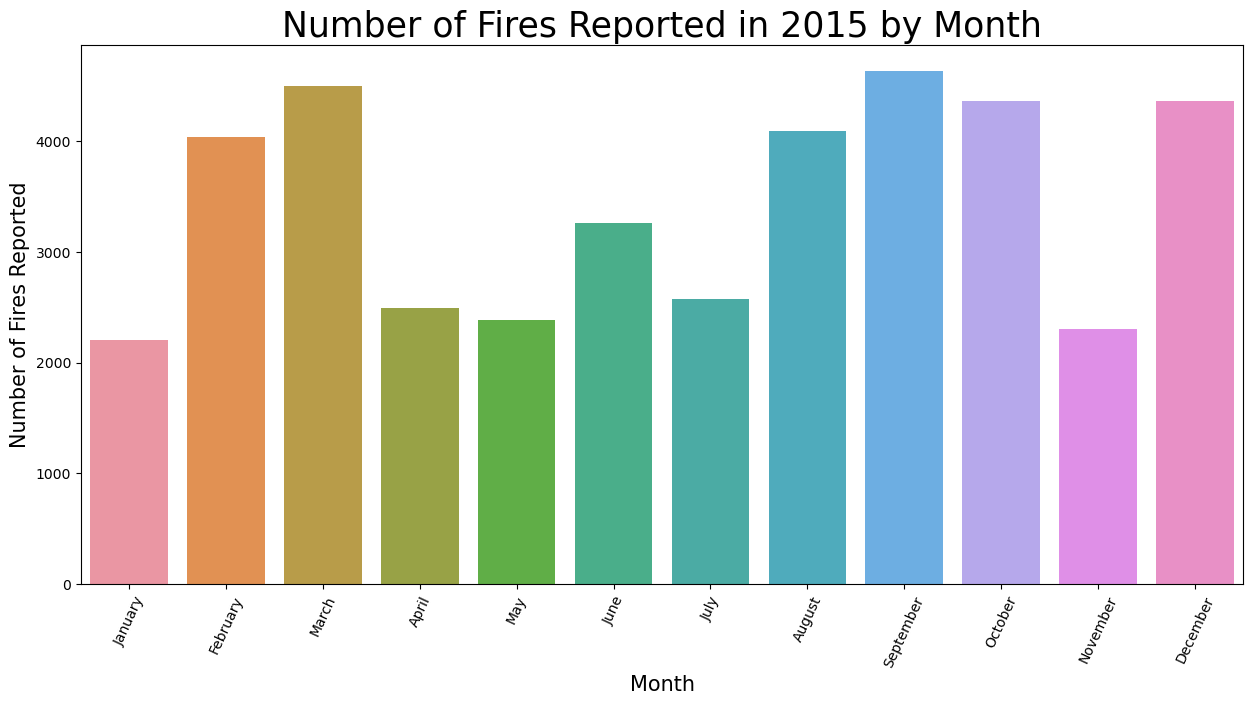

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(x='Month_Eng', y='number', data=test8)
plt.title('Number of Fires Reported in 2015 by Month', fontsize=25)
plt.xticks(rotation=65)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Fires Reported', fontsize=15)
plt.show()

### 16. Find Average Number of Fires Reported in Descending Order by State

In [ ]:
test9 = df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
test9

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


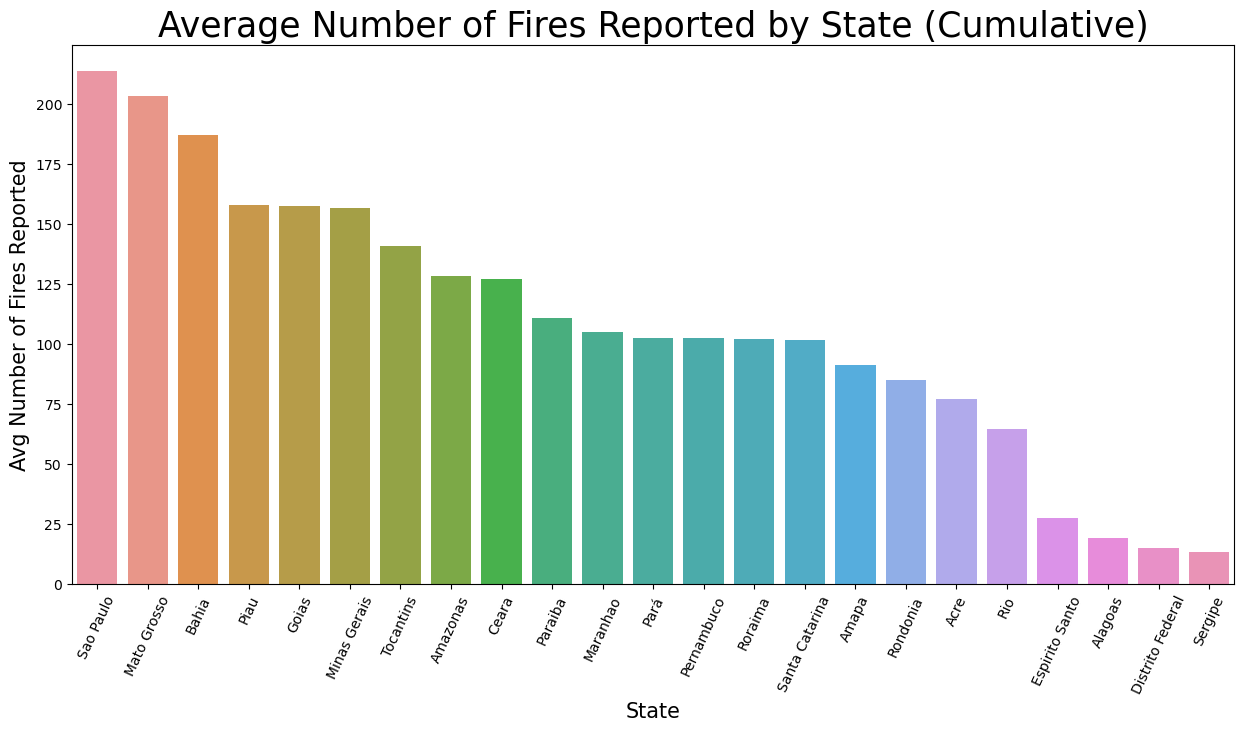

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='state', y='number', data=test9)
plt.title('Average Number of Fires Reported by State (Cumulative)', fontsize=25)
plt.xticks(rotation=65)
plt.xlabel('State', fontsize=15)
plt.ylabel('Avg Number of Fires Reported', fontsize=15)
plt.show()